In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001CBB78C8630>

In [6]:
labels = []
file_name = 'label.txt'
with open(file_name,'rt') as file:
    labels = file.read().rstrip('\n').split('\n')

print("Total number of labels: ",len(labels))
print("The labels are: \n",labels)

Total number of labels:  80
The labels are: 
 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


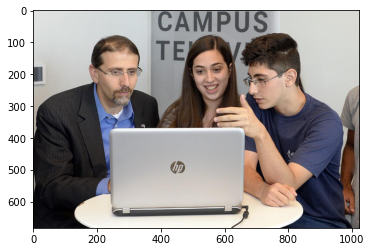

In [28]:
img1 = cv2.imread('./img/test1.jpg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)) # converted the image from bgr to rgb

In [29]:
ClassIndex, confidence, bbox = model.detect(img1,confThreshold=0.7)

In [30]:
print(ClassIndex)

[[ 1]
 [ 1]
 [ 1]
 [73]]


In [31]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ind, conf, box, in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img1,box,(225,0,0),2)
    cv2.putText(img1,labels[ind-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,225,0),thickness=3)

True

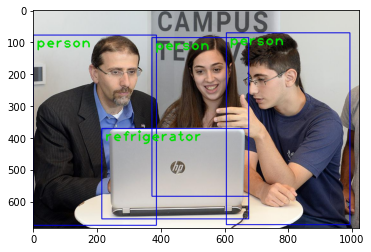

In [32]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
cv2.imwrite('./img/result1.jpg',img1)

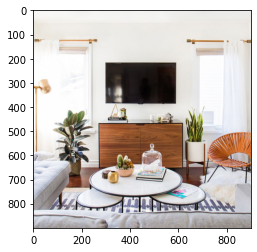

In [45]:
img2 = cv2.imread('./img/test2..jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [46]:
ClassIndex, confidence, bbox = model.detect(img2,confThreshold=0.5)

In [47]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ind, conf, box, in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img2,box,(225,0,0),2)
    cv2.putText(img2,labels[ind-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,225,0),thickness=3)

True

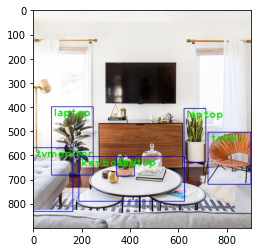

In [48]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
cv2.imwrite('./img/result2.jpg',img2)